<center><font size="16">Human Resource Analysis</font></center>

Companies aim to cultivate a positive work environment by recognizing and addressing factors linked to employee turnover. Understanding these elements contributes to employee well-being, productivity, and organizational growth. Managers can utilize these insights to proactively take corrective measures for business success.

In this notebook, the project focuses on identifying key factors contributing to employee turnover and building a predictive model to determine if an employee is likely to leave the company.


### Column Description

- **satisfaction_level:** Indicates the satisfaction level of a particular employee.
- **last_evaluation:** Reflects the last evaluation score of a particular employee.
- **number_project:** Illustrates the number of projects handled by a specific employee.
- **average_monthly_hours:** Represents the monthly hours spent by a particular employee.
- **time_spend_company:** Displays the number of years spent by the employee in the company.
- **work_accident:** Indicates whether an employee has been involved in a work accident (1 for yes, 0 for no).
- **left:** Binary indicator of employee departure, where 0 means not left and 1 means left.
- **promotion_last_5years:** Indicates whether an employee received a promotion in the last 5 years (1 for yes, 0 for no).
- **dept:** Represents the department to which the employee belongs.
- **salary:** Indicates the salary type of the employee.


# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sns.set()
# %matplotlib inline

## 2. Loading Data & Basic Analysis

In [2]:
# Loading the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [3]:
# Finding the shape
df.shape

(14999, 10)

In [4]:
# Displaying the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Finding the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Finding the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.describe(include='object')

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
# Finding the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

**No of employees who left the company**

In [9]:
# Count of how many employees left the company
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

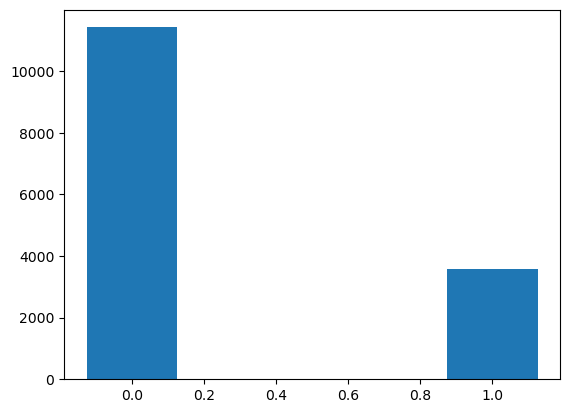

In [10]:
plt.bar(df['left'].value_counts().index,df['left'].value_counts().values,width=0.25)
plt.show()

**Number of projects being handled**

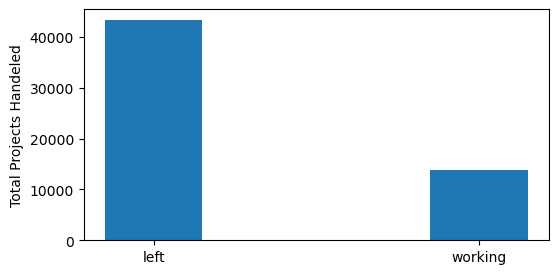

In [11]:
groups = df[['number_project','left']].groupby('left')
num_prj = (groups.sum())['number_project']
plt.figure(figsize=(6,3))
plt.bar(num_prj.index,num_prj.values,width = 0.3)
plt.ylabel('Total Projects Handeled')
plt.xticks([0, 1], ['left', 'working'])
plt.show()

- A noticeable difference exists in the number of projects handled by employees who have left the company compared to those who have not.

**Impact of Number of Projects on Employee Turnover**

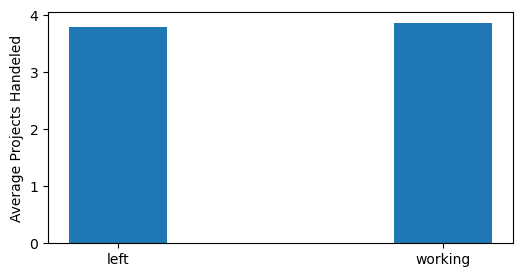

In [12]:
avg_prj = (groups.mean())['number_project']
plt.figure(figsize=(6,3))
plt.bar(avg_prj.index,avg_prj.values,width = 0.3)
plt.ylabel('Average Projects Handeled')
plt.xticks([0, 1], ['left', 'working'])
plt.show()

**Plotting Turnover Findings**

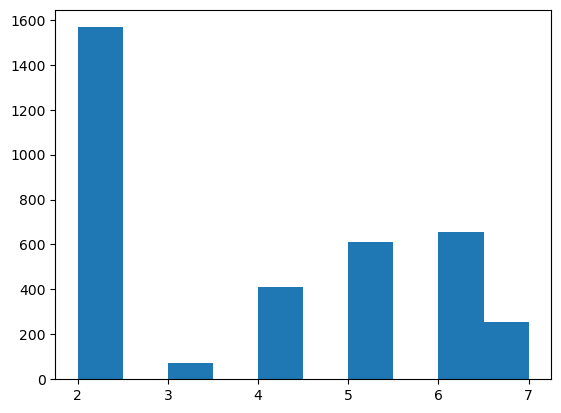

In [13]:
people_left =df.loc[df['left']==1,'number_project']
plt.hist(people_left)
plt.show()

- Employees who received either 2 projects, indicating minimal workload, or those assigned 5 to 6 projects, have exhibited a trend of choosing to leave the company.

## **Time spent at the company**

In [14]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [15]:
# plot for the count of years here
years= df['time_spend_company'].value_counts(normalize=True)*100
# plt.hist(df['time_spend_company'],edgecolor='red')
years

time_spend_company
3     42.956197
2     21.628109
4     17.047803
5      9.820655
6      4.786986
10     1.426762
7      1.253417
8      1.080072
Name: proportion, dtype: float64

- The maximum time spent by an employee is 10 years. Notably, a considerable number of employees exhibit a higher likelihood of leaving the company after spending 3 years.

In [16]:
np.round(df['left'].value_counts(normalize = True)*100,2)

left
0    76.19
1    23.81
Name: proportion, dtype: float64

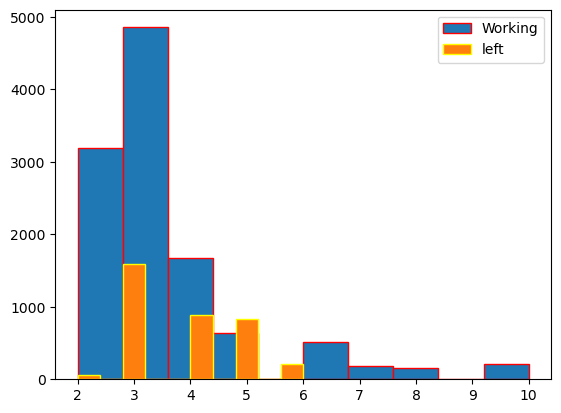

In [17]:
plt.hist(df.loc[df['left']==0,'time_spend_company'],label='Working',edgecolor='red')
plt.hist(df.loc[df['left']==1,'time_spend_company'],label='left',edgecolor='yellow')
plt.legend()
plt.show()

- Based on the analysis, it appears that a significant number of employees are more likely to leave the company after approximately **3 years** of tenure.

## **Employees engaged in any work accident**

In [18]:
# total employees
df.shape[0]

14999

**Count of Employees Involved in Work Accidents**

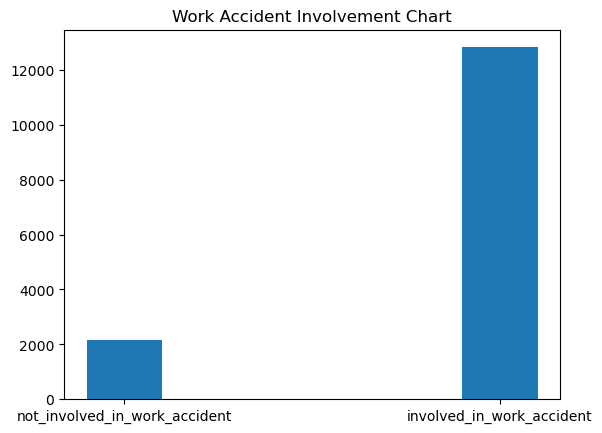

In [19]:
# Number of employees involved in work accident
no_emp_acd = sum(df['Work_accident']==1)
no_emp_acd

plt.bar([0,1],[no_emp_acd,df.shape[0]-no_emp_acd],width=0.2)
plt.xticks([0,1],['not_involved_in_work_accident','involved_in_work_accident'])
plt.title("Work Accident Involvement Chart")
plt.show()

- Majority of worker are invloved in some kind of work accident.

**Work Accident Impact Analysis on Employee Departure**

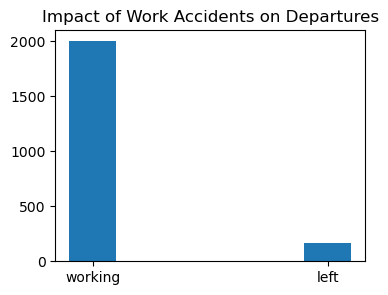

In [20]:
left_accident_count = df[df['Work_accident']==1]['left'].value_counts()
plt.figure(figsize=(4,3))
plt.bar(left_accident_count.index,left_accident_count.values,width=0.2)
plt.xticks([0,1],['working','left'])
plt.title('Impact of Work Accidents on Departures')
plt.show()

## **Promotions in last 5 years**

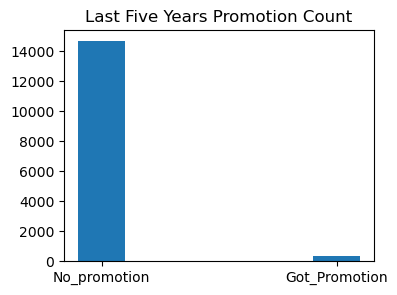

In [22]:
promotion_count = df['promotion_last_5years'].value_counts()
plt.figure(figsize=(4,3))
plt.bar(promotion_count.index,promotion_count.values,width=0.2)
plt.xticks([0,1],['No_promotion','Got_Promotion'])
plt.title('Last Five Years Promotion Count')
plt.show()

## **Salary trends**

In [23]:
left = df.loc[df['left']==1,'salary']
working = df.loc[df['left']==0,'salary']
bar_width = 0.2

left.value_counts().index


Index(['low', 'medium', 'high'], dtype='object', name='salary')

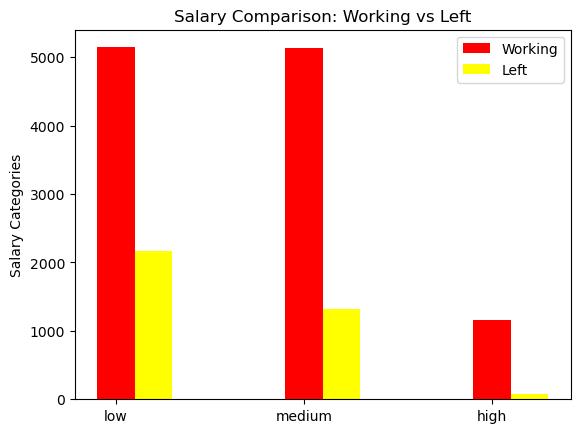

In [24]:
fig, ax = plt.subplots()
index=np.arange(3)
ax.bar(index , working.value_counts().values, bar_width, label='Working', color='red')
ax.bar(index+bar_width, left.value_counts().values, bar_width, label='Left', color='yellow')
plt.xticks([0,1,2],left.value_counts().index)
plt.legend()
plt.ylabel('Salary Categories')
plt.title('Salary Comparison: Working vs Left')
plt.show()

**Salary and Likelihood of Employee Departure**

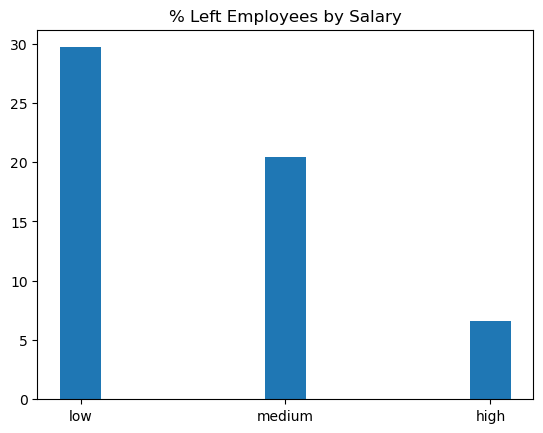

In [25]:
total_catgory = working.value_counts().values+left.value_counts().values
plt.bar(index,np.round(left.value_counts().values*100.0/total_catgory,2),width=0.2)
plt.xticks([0,1,2],left.value_counts().index)
plt.title('% Left Employees by Salary')
plt.show()


- Highest percentage of people who left are from **low salary** category. As the salary increase the turnover decrease

## **Employees per Department**

In [26]:
left_dept_counts = df.groupby('left')['dept'].value_counts().unstack()
left_dept_counts

dept,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


In [27]:
left_dept_counts.columns.size

10

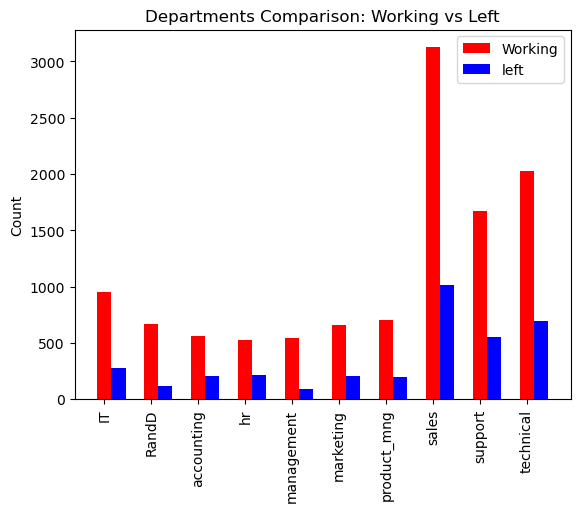

In [28]:
bar_width = 0.3
fig, ax = plt.subplots()
index=np.arange(10)
ax.bar(index ,left_dept_counts.loc[0,:], bar_width, label='Working', color='red')
ax.bar(index + bar_width,left_dept_counts.loc[1,:], bar_width, label='left', color='blue')
plt.xticks([0,1,2,3,4,5,6,7,8,9],left_dept_counts.columns.tolist(),rotation=90)
plt.legend()
plt.ylabel('Count')
plt.title('Departments Comparison: Working vs Left')
plt.show()

- **Sales** department is the largest department

**Identifying Turnover Percentage by Department**

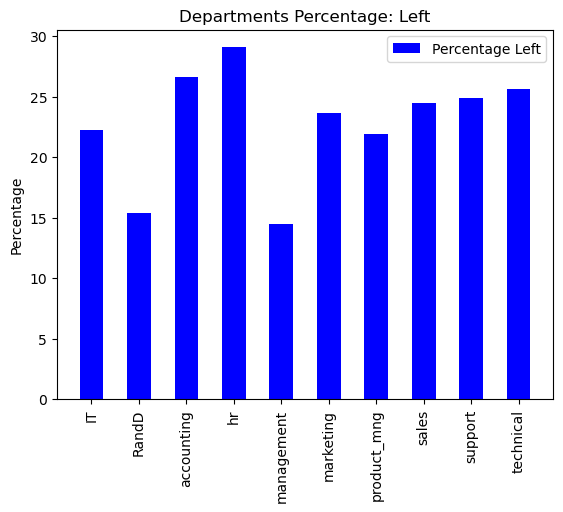

In [29]:
total = left_dept_counts.sum(axis=0)
bar_width = 0.5
fig, ax = plt.subplots()
index=np.arange(10)
ax.bar(index ,left_dept_counts.loc[1,:]*100.0/total, bar_width, label='Percentage Left', color='b')
plt.xticks([0,1,2,3,4,5,6,7,8,9],left_dept_counts.columns.tolist(),rotation=90)
plt.legend()
plt.ylabel('Percentage')
plt.title('Departments Percentage: Left')
plt.show()

- Highest percentage of turnover is from departments : **Accounting** & **HR**

## **Satisfaction Level**

<Axes: xlabel='satisfaction_level', ylabel='Density'>

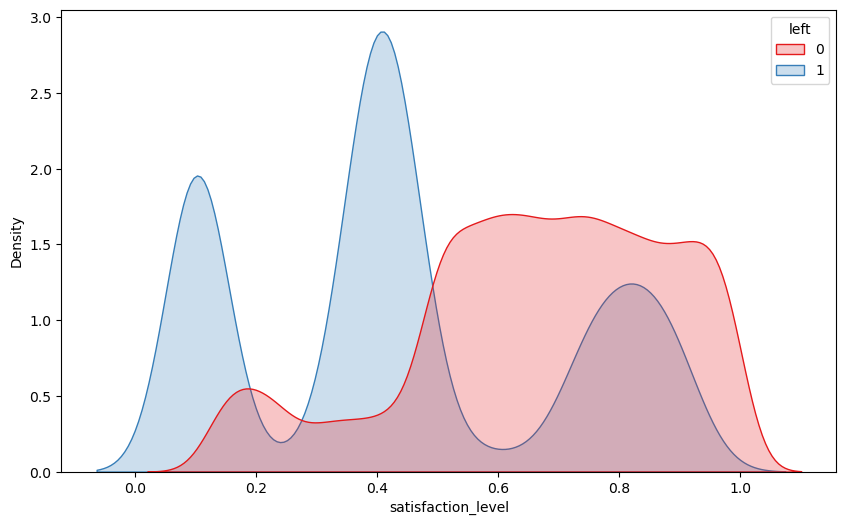

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='satisfaction_level', hue='left', fill=True, common_norm=False, palette='Set1')


- The people who left have low satifaction compared to those who are working.

# Feature Engineering

**Utilizing Satisfaction Levels**

In the process of feature engineering, two new features will be introduced based on satisfaction levels. Instances where satisfaction levels fall below 0.5 suggest a higher likelihood of turnover, while levels above 0.5 indicate a greater chance of retention.


**Creating a New Feature 'satisfaction_level_type'**

I'll generate a new feature called 'satisfaction_level_type' based on the following conditions:
- If satisfaction_level is greater than or equal to 0.5, set satisfaction_level_type to 'High'.
- If satisfaction_level is less than 0.5, set satisfaction_level_type to 'Low'.


In [31]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type']=np.where(df['satisfaction_level']>=0.5,'High','Low')
df['satisfaction_level_type'].value_counts()

satisfaction_level_type
High    10416
Low      4583
Name: count, dtype: int64

**Exploration Step: Count Plot for Satisfaction Level Types**

<Axes: xlabel='satisfaction_level_type', ylabel='count'>

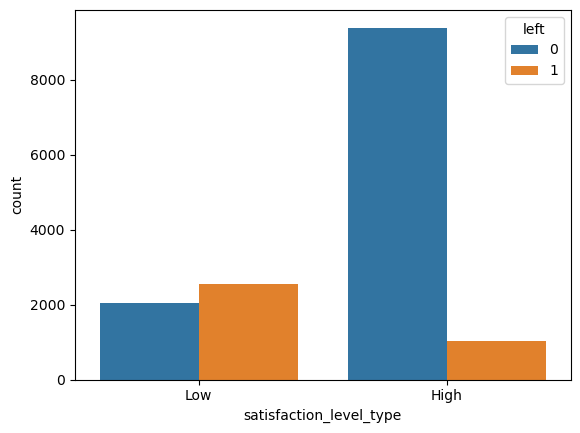

In [32]:
# Write Code Here
sns.countplot(x='satisfaction_level_type', hue='left', data=df)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'satisfaction_level_type'],
      dtype='object')

<BarContainer object of 6 artists>

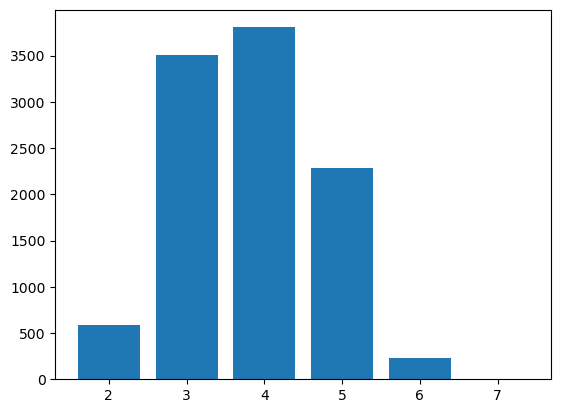

In [34]:
prj_satisfaction_level = df[df['satisfaction_level_type']=='High']['number_project'].value_counts()
plt.bar(prj_satisfaction_level.index.tolist(),prj_satisfaction_level.values)

Now lets check number of projects for low satisfaction level

<BarContainer object of 6 artists>

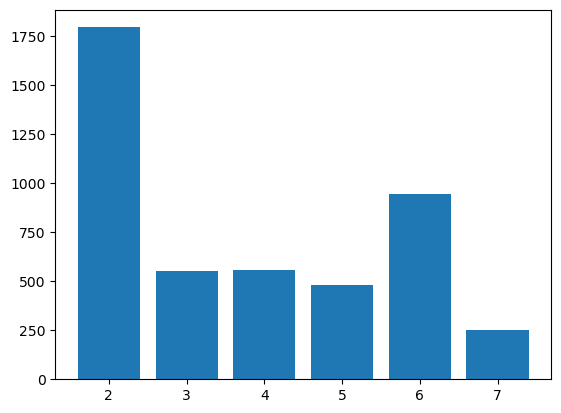

In [35]:
prj_satisfaction_level = df[df['satisfaction_level_type']=='Low']['number_project'].value_counts()
plt.bar(prj_satisfaction_level.index.tolist(),prj_satisfaction_level.values)

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

Creating a new column named **employee_type** with categories:
- 'unburdened' for employees with 2 projects
- 'Satisfactory' for those with 3 to 5 projects
- 'Burdened' for employees with 6 or more projects.


In [36]:
df['employee_type'] = np.select(
    [
        (df['number_project'] == 2),
        (df['number_project'].between(3, 5)),
        (df['number_project'] >= 6)
    ],
    [
        'unburdened',
        'satisfactory',
        'burdened'
    ],
    default='unknown'
)

In [37]:
df['employee_type'].value_counts()


employee_type
satisfactory    11181
unburdened       2388
burdened         1430
Name: count, dtype: int64

**Project Burden and Employee Turnover Analysis**

<Axes: xlabel='employee_type', ylabel='count'>

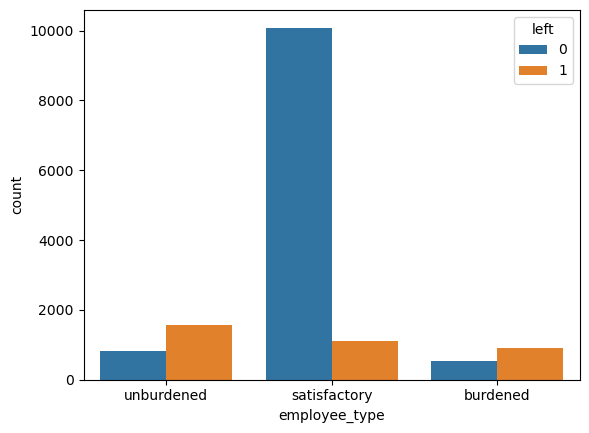

In [38]:
sns.countplot(x='employee_type', hue='left', data=df)

### Removing Redundant Features

In [39]:
df = df.drop(columns=['satisfaction_level','number_project'])

In [45]:
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,unburdened
1,0.86,262,6,0,1,0,sales,medium,High,satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,burdened
3,0.87,223,5,0,1,0,sales,low,High,satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,unburdened


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

In [47]:
df_encoded = pd.get_dummies(df,columns=['dept','salary','satisfaction_level_type','employee_type'])
df_encoded.columns

Index(['last_evaluation', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'dept_IT',
       'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management',
       'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support',
       'dept_technical', 'salary_high', 'salary_low', 'salary_medium',
       'satisfaction_level_type_High', 'satisfaction_level_type_Low',
       'employee_type_burdened', 'employee_type_satisfactory',
       'employee_type_unburdened'],
      dtype='object')

**Spliting Dataset**

In [48]:
X=df_encoded.drop(columns=['left'])
Y=df_encoded['left']

In [49]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Getting the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Evaluation Metrics used for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [60]:
random_forest = RandomForestClassifier(n_estimators=200,random_state=42)

random_forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [61]:
rf_predictions = random_forest.predict(X_test)


**Precision**

In [63]:
precision = precision_score(y_test, rf_predictions)
precision

0.9787822878228782

**Accuracy**

In [64]:
accuracy = accuracy_score(y_test, rf_predictions)
accuracy

0.9864444444444445

In [ ]:
# Write the code to calculate
rf_acc=None

**Recall**

In [65]:
recall = recall_score(y_test, rf_predictions)
recall

0.9654231119199272

**F1-Score**

In [66]:
f1 = f1_score(y_test, rf_predictions)
f1

0.9720568025652772

**Classification Report**

In [68]:
class_score = classification_report(y_test, rf_predictions)
print(class_score)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.98      0.97      0.97      1099

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [116]:
logistic_regression = LogisticRegression(
    solver='saga',
    max_iter=2500,
    random_state=100,
    penalty='elasticnet',
    l1_ratio=0.3,
    tol=1e-3
)


logistic_regression.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.3, max_iter=2500, penalty='elasticnet',
                   random_state=100, solver='saga', tol=0.001)

In [117]:
lr_predictions = logistic_regression.predict(X_test)

**Accuracy**

In [118]:
accuracy = accuracy_score(y_test, lr_predictions)
accuracy

0.8804444444444445

**Precision**

In [119]:
precision = precision_score(y_test, lr_predictions)
precision

0.7813440320962889

**Recall**

In [120]:
recall = recall_score(y_test, lr_predictions)
recall

0.7088262056414922

**F1 Score**

In [122]:
f1 = f1_score(y_test, lr_predictions)
f1

0.743320610687023

**Classification Report**

In [123]:
class_score = classification_report(y_test, lr_predictions)
print(class_score)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3401
           1       0.78      0.71      0.74      1099

    accuracy                           0.88      4500
   macro avg       0.84      0.82      0.83      4500
weighted avg       0.88      0.88      0.88      4500



## Ada Boost

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(learning_rate=0.7,n_estimators =70,random_state=42)

ada_boost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=70, random_state=42)

In [144]:
# Make predictions
ada_predictions = ada_boost.predict(X_test)

**Accuracy**

In [145]:
accuracy = accuracy_score(y_test, ada_predictions)
accuracy

0.9304444444444444

**Precision**

In [146]:
precision = precision_score(y_test, ada_predictions)
precision

0.8686679174484052

**Recall**

In [147]:
recall = recall_score(y_test, ada_predictions)
recall

0.8425841674249318

**F1-Score**

In [149]:
f1 = f1_score(y_test, ada_predictions)
f1

0.8554272517321017

**Classification Report**

In [151]:
#Write code here
class_report = classification_report(y_test, ada_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.87      0.84      0.86      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [157]:
# !pip install xgboost
from xgboost import XGBClassifier

In [163]:
xg_boost = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', scale_pos_weight=1, random_state=100, n_jobs=-1
)

xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

In [174]:
# Get the predictions
xgb_predications=xg_boost.predict(X_test)

**Accuracy**

In [175]:
xgb_accuracy= accuracy_score(xgb_predications,y_test)
xgb_accuracy

0.9657777777777777

**Precision**

In [177]:
xgb_precision= precision_score(xgb_predications,y_test)
xgb_precision

0.9262966333030027

**Recall**

In [178]:
xgb_recall=recall_score(xgb_predications,y_test)
xgb_recall

0.9330889092575618

**F1-Score**

In [179]:
xgb_f1_score=f1_score(xgb_predications,y_test)
xgb_f1_score

0.9296803652968036

**Classification Report**

In [180]:
print(classification_report(xgb_predications,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3409
           1       0.93      0.93      0.93      1091

    accuracy                           0.97      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



# Result Comparisons

In [183]:
models = ['Random Forest', 'Logistic Regression', 'AdaBoost', 'XGBoost']
predictions = [rf_predictions, lr_predictions, ada_predictions, xgb_predications]

results = []

# Iterate over models
for model, preds in zip(models, predictions):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

In [184]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.986444,0.978782,0.965423,0.972057
1,Logistic Regression,0.880444,0.781344,0.708826,0.743321
2,AdaBoost,0.930444,0.868668,0.842584,0.855427
3,XGBoost,0.965778,0.933089,0.926297,0.929680


**Random forest** is performing best compared to other models with best accuracy,f1 score, precision and recall.